Load image and get the histogram


In [1]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from PIL import Image
data_dir = '../data/'

In [2]:
pgm = Image.open(data_dir+"otsu-01.pgm")
print(len(pgm.split()))

1


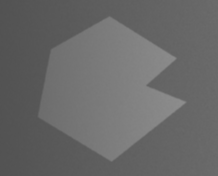

In [3]:
pgm

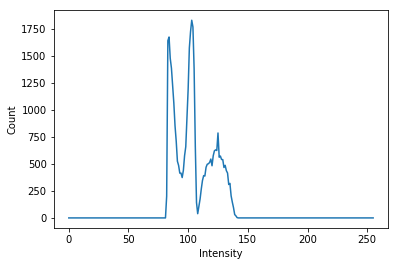

In [4]:
a = pgm.histogram()
def plot_histogram(a):
    %matplotlib inline
    plt.plot(a)
    plt.ylabel('Count')
    plt.xlabel('Intensity')
    plt.show()
plot_histogram(a)

In [5]:
def load_image(image_path):  
    filename =os.path.abspath(image_path)
    im = Image.open(filename)
    height = im.height
    width  = im.width
    im = im.convert('RGB')
    channels = len(im.split())
    return (im,width,height,channels)

# Histogram
Historam in rgb will be 3 else 1 

In [6]:
def get_histogram(image):
    channels = len(image.split())
    pixels = np.asarray(image)
    channel_hist= np.zeros((channels,255),dtype=np.int)
   
    #histogram=[len(channels),[]]
    for c in range(channels):
        for y in range(image.height):
            for x in range(image.width):
                if(channels > 1):
                    value = pixels[c][y][x] # Image is flipped :\
                else:
                    value = pixels[y][x]
                #print(value)
                channel_hist[c][value]+=1
    return channel_hist

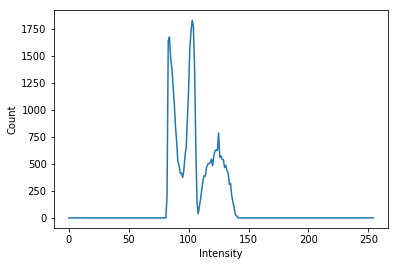

In [7]:
temp =get_histogram(pgm)
plot_histogram(temp[0])

In [8]:
def topographic(image):
    channels = len(image.split())
    pixels = np.asarray(image)
    
    top= np.zeros((channels,image.height,image.width),dtype=np.int)
   
    #histogram=[len(channels),[]]
    for c in range(channels):
        for y in range(image.height):
            for x in range(image.width):
                if(channels > 1):
                    value = pixels[c][y][x] # Image is flipped :\
                else:
                    value = pixels[y][x]
                top[c][y][x]=value
    return top

In [ ]:
top =topographic(pgm)

In [ ]:
x,y = top[0].nonzero()
x = np.asarray(x)
y = np.asarray(y)

print(x)
print(y)

def pl3(data_array):
    %matplotlib notebook
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
 
    x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                                  np.arange(data_array.shape[0]) )
   
    x_data = x_data.flatten()
    y_data = y_data.flatten()
    z_data = data_array.flatten()
    ax.bar3d( x_data,
              y_data,
              np.zeros(len(z_data)),
              1, 1, z_data )
    
    plt.show()
pl3(top[0])

[  0   0   0 ..., 175 175 175]
[  0   1   2 ..., 215 216 217]


<IPython.core.display.Javascript object>